In [215]:
%matplotlib inline
!pip install -U fortran-magic
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [216]:

jan2018 = pd.to_datetime(['2018-01-03 00:00:00+00:00',
 '2018-01-04 00:00:00+00:00',
 '2018-01-05 00:00:00+00:00',
 '2018-01-06 00:00:00+00:00',
 '2018-01-09 00:00:00+00:00',
 '2018-01-10 00:00:00+00:00',
 '2018-01-11 00:00:00+00:00',
 '2018-01-12 00:00:00+00:00',
 '2018-01-13 00:00:00+00:00',
 '2018-01-17 00:00:00+00:00',
 '2018-01-18 00:00:00+00:00',
 '2018-01-19 00:00:00+00:00',
 '2018-01-20 00:00:00+00:00',
 '2018-01-23 00:00:00+00:00',
 '2018-01-24 00:00:00+00:00',
 '2018-01-25 00:00:00+00:00',
 '2018-01-26 00:00:00+00:00',
 '2018-01-27 00:00:00+00:00',
 '2018-01-30 00:00:00+00:00',
 '2018-01-31 00:00:00+00:00',
 '2018-02-01 00:00:00+00:00'])
calendar2018 = jan2018.values.astype('datetime64[D]')

eventnewdates = pd.to_datetime(['2018-01-06 00:00:00+00:00', 
                             '2018-01-07 00:00:00+00:00', 
                             '2018-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
eventnewvalues = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/me.jpg?raw=true" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [217]:
assert ran_the_first_cell, "Oh noes!"

In [218]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

New Example


In [219]:
h = [2, 'two', "three", 4, 5.0, "six", "seven", 8.0]
h

[2, 'two', 'three', 4, 5.0, 'six', 'seven', 8.0]

## Lists can be indexed like C-style arrays.

In [220]:

first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


New Example


In [221]:
third = h[2]
fourth = h[3]
print("third:", third)
print("fourth:", fourth)

third: three
fourth: 4


##  Negative indexing gives elements relative to the end of the list.

In [222]:
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


New Example


In [223]:
other = h[-3]
newOther = h[-1]
print("other:", other)
print("New Other:", newOther)

other: six
New Other: 8.0


## Lists can also be sliced, which makes a copy of elements between


##Start (inclusive) and Stop (exclusive)

In [224]:

sublist = l[1:3]
sublist

['two', 3.0]

New Example

In [225]:
sublist = h[0:4]
sublist

[2, 'two', 'three', 4]

## l[:N] is equivalent to l[0:N].

In [226]:

first_three = l[:3]
first_three

[1, 'two', 3.0]

New Example


In [227]:
newFive = h[:5]
newFive

[2, 'two', 'three', 4, 5.0]

## l[3:] is equivalent to l[3:len(l)].

In [228]:
after_three = l[3:]
after_three

[4, 5.0, 'six']

New Example

In [229]:
after_two = h[2:]
after_two

['three', 4, 5.0, 'six', 'seven', 8.0]

## There's also a third parameter, "step", which gets every Nth element.

In [230]:
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

New Example

In [231]:
h = ['1', '2', '3', '4', '5', '6', '7', '8' ,'9']
h[1:8:3]

['2', '5', '8']

## This is a cute way to reverse a list.

In [232]:
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

New Example

In [233]:
h[::-1]

['9', '8', '7', '6', '5', '4', '3', '2', '1']

## Lists can be grown efficiently (in O(1) amortized time).

In [234]:

l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


New Example

In [235]:
y = [2, 4, 6, 8, 10]
print("Before:", y)
y.append('twelve')
print("After:", y)
y.append(14)
print("After this:", y)

Before: [2, 4, 6, 8, 10]
After: [2, 4, 6, 8, 10, 'twelve']
After this: [2, 4, 6, 8, 10, 'twelve', 14]


## Comprehensions let us perform elementwise computations.

In [236]:
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

New Example

In [237]:
j = [15, 25, 35, 45, 555]
[x * 3 for x in j]

[45, 75, 105, 135, 1665]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

## Dictionaries are key-value mappings 

In [238]:
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

New Example

In [239]:
authors = {'Gabriel': 'Garcia ', 'Rafael ': 'Pombo', 'Jose': 'Rivera'}
authors 

{'Gabriel': 'Garcia ', 'Jose': 'Rivera', 'Rafael ': 'Pombo'}

## Like lists, dictionaries are size-mutable.

In [240]:
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

New Example

In [241]:
authors['Jorge '] = 'Isaacs'
authors

{'Gabriel': 'Garcia ',
 'Jorge ': 'Isaacs',
 'Jose': 'Rivera',
 'Rafael ': 'Pombo'}

In [242]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

New Example

In [243]:
del authors['Gabriel']
authors

{'Jorge ': 'Isaacs', 'Jose': 'Rivera', 'Rafael ': 'Pombo'}

## No slicing.

In [244]:
#philosophers['Bertrand':'Immanuel']

New Example

In [245]:
#authors['Candelario ':'Obeso']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pacino.gif?raw=true" alt="Drawing" style="width: 100%;"/></center>


## Suppose we have some matrices...

In [246]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [247]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

New Example

In [248]:
x = [[2, 4, 6],
     [2, 6, 4],
     [2, 2, 2],
     [1, 1, 1]]

y = [[2, 4, 6, 8],
     [2, 4, 16, 32]]

In [249]:
def otherMatmul(X, Y):
    """Multiply matrix A by matrix B."""
    rows_out = len(X)
    cols_out = len(Y[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(Y)):
                out[i][j] += X[i][k] * Y[k][j]
    return out

--------------------------------------------------------------------------------------------------------

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/gross.gif?raw=true" alt="Drawing" style="width: 50%;"/></center>


In [250]:
%%time

matmul(a, b)

CPU times: user 41 µs, sys: 4 µs, total: 45 µs
Wall time: 55.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

New Example

In [251]:
%%time
otherMatmul(x, y)

CPU times: user 0 ns, sys: 43 µs, total: 43 µs
Wall time: 48.6 µs


[[12, 24, 76, 144], [16, 32, 108, 208], [8, 16, 44, 80], [4, 8, 22, 40]]

--------------------------------------------------------------------------------------------------------

In [252]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.38834244889854197, 0.6877685868353881, 0.7567899221231262],
 [0.05431338239962469, 0.13309171372689188, 0.13201168697277788]]

New Example

In [253]:
import random
def otherRandom(p, q):
    out = []
    for row in range(p):
        out.append([random.random() for _ in range(q)])
    return out

newRandom = otherRandom(5, 2)
newRandom

[[0.7754827635811915, 0.9675917014042277],
 [0.5000838491651552, 0.43191350283987584],
 [0.33372042372282185, 0.4436433407955156],
 [0.9599378507232845, 0.9703904611386915],
 [0.5508833606725639, 0.39186512793833406]]

--------------------------------------------------------------------------------------------------------

In [254]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.51 s, sys: 30.6 ms, total: 9.54 s
Wall time: 9.6 s


New Example

In [255]:
%%time
randomx = otherRandom(10, 50)
randomy = otherRandom(10, 60)
h = otherMatmul(randomx, randomy)

CPU times: user 3.3 ms, sys: 0 ns, total: 3.3 ms
Wall time: 3.77 ms


--------------------------------------------------------------------------------------------------------

## Maybe that's not that bad?  Let's try a simpler case.

In [256]:
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

New Example

In [257]:
def python_plus_product(hs, ts):
    return sum(h + t for h, t in zip(hs, ts))

--------------------------------------------------------------------------------------------------------

In [258]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

New Example

In [259]:
%%fortran
subroutine fortran_plus_product(hs, ts, result)
    double precision, intent(in) :: hs(:)
    double precision, intent(in) :: ts(:)
    double precision, intent(out) :: result
    
    result = sum(hs + ts)
end

--------------------------------------------------------------------------------------------------------

In [260]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

New Example

In [261]:
list_ex = [float(i) for i in range(100000)]
array_ex = np.array(list_data)

--------------------------------------------------------------------------------------------------------

In [262]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.9 ms, sys: 61 µs, total: 13 ms
Wall time: 13.5 ms


333328333350000.0

New Example

In [263]:
%%time
python_plus_product(list_ex, list_ex)

CPU times: user 12.9 ms, sys: 0 ns, total: 12.9 ms
Wall time: 13.3 ms


9999900000.0

--------------------------------------------------------------------------------------------------------

In [264]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 157 µs, sys: 14 µs, total: 171 µs
Wall time: 180 µs


333328333350000.0

New Example

In [265]:
%%time
fortran_plus_product(array_ex, array_ex)

CPU times: user 175 µs, sys: 15 µs, total: 190 µs
Wall time: 241 µs


9999900000.0

--------------------------------------------------------------------------------------------------------

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/sloth.gif?raw=true" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

## Dynamic typing.

In [266]:
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

New Example

In [267]:
def newsumelemwise(ps, qs):
    return [p * q for p, q in zip(ps, qs)]

newsumelemwise([1, 2, 3, 4, 5, 6], [1, 3 + 0j, 5.0, 'five'])

[1, (6+0j), 15.0, 'fivefivefivefive']

--------------------------------------------------------------------------------------------------------

## Interpretation overhead. 

In [268]:
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


New Example

In [269]:
newcode = 'x + y * z**2'
newbytecode = compile(newcode, '', 'eval')
import dis; dis.dis(newbytecode)

  1           0 LOAD_NAME                0 (x)
              2 LOAD_NAME                1 (y)
              4 LOAD_NAME                2 (z)
              6 LOAD_CONST               0 (2)
              8 BINARY_POWER
             10 BINARY_MULTIPLY
             12 BINARY_ADD
             14 RETURN_VALUE


--------------------------------------------------------------------------------------------------------

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/runaway.gif?raw=true" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/thisisfine.gif?raw=true" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [270]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

New Example

In [271]:
import numpy as np

ex = np.array([2,4,5,8,10])
ex

array([ 2,  4,  5,  8, 10])

In [272]:
data + data

array([2, 4, 6, 8])

New Example

In [273]:
ex + ex

array([ 4,  8, 10, 16, 20])

## Naive dot product 

In [274]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 623 µs, total: 623 µs
Wall time: 880 µs


333328333350000.0

New Example

In [275]:
%%time
(array_ex * array_ex).sum()

CPU times: user 676 µs, sys: 0 ns, total: 676 µs
Wall time: 1.12 ms


333328333350000.0

## Built-in dot product.

In [276]:
%%time
array_data.dot(array_data)

CPU times: user 1.62 ms, sys: 9.24 ms, total: 10.9 ms
Wall time: 12.2 ms


333328333350000.0

New Example

In [277]:
%%time
array_ex.dot(array_ex)

CPU times: user 0 ns, sys: 280 µs, total: 280 µs
Wall time: 151 µs


333328333350000.0

--------------------------------------------------------------------------------------------------------

In [278]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 185 µs, sys: 0 ns, total: 185 µs
Wall time: 201 µs


333328333350000.0

New Example

In [279]:
%%time
fortran_plus_product(array_ex, array_ex)

CPU times: user 154 µs, sys: 14 µs, total: 168 µs
Wall time: 175 µs


9999900000.0

--------------------------------------------------------------------------------------------------------

## Numpy won't allow us to write a string into an int array.

In [280]:
#data[0] = "foo"

New Example

In [281]:
#ex[0] = "error"

--------------------------------------------------------------------------------------------------------

## We also can't grow an array once it's created.

In [282]:
#data.append(3)

New Example

In [283]:
#ex.append(3)

--------------------------------------------------------------------------------------------------------

## We **can** reshape an array though.

In [284]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

New Example

In [285]:
five_by_one = ex.reshape(5,1)
five_by_one

array([[ 2],
       [ 4],
       [ 5],
       [ 8],
       [10]])

--------------------------------------------------------------------------------------------------------

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [286]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


Example

In [287]:
newArr = np.array([2,4,6,8,10,12], dtype='int16').reshape(2, 3)
print("Array:\n",newArr, sep='')
print("===========")
print("DType:", newArr.dtype)
print("Shape:", newArr.shape)
print("Strides:", newArr.strides)
print("Data:", newArr.data.tobytes())

Array:
[[ 2  4  6]
 [ 8 10 12]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x02\x00\x04\x00\x06\x00\x08\x00\n\x00\x0c\x00'


--------------------------------------------------------------------------------------------------------

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [288]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Example

In [289]:
newData = np.arange(30).reshape(6, 5)
newData

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

--------------------------------------------------------------------------------------------------------

## Binary operators.

In [290]:
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

Example

In [291]:
newData * newData

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576],
       [625, 676, 729, 784, 841]])

--------------------------------------------------------------------------------------------------------

## Unary functions.

In [292]:
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

Example

In [293]:
np.sqrt(newData)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949],
       [5.        , 5.09901951, 5.19615242, 5.29150262, 5.38516481]])

--------------------------------------------------------------------------------------------------------

## Comparison operations

In [294]:
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

Example

In [295]:
(newData % 4) == 0

array([[ True, False, False, False,  True],
       [False, False, False,  True, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [ True, False, False, False,  True],
       [False, False, False,  True, False]])

--------------------------------------------------------------------------------------------------------

## Boolean combinators.

In [296]:
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

Example

In [297]:
((newData % 3) == 0) & ((newData % 1) == 0) |  ((newData % 2) == 0)

array([[ True, False,  True,  True,  True],
       [False,  True, False,  True,  True],
       [ True, False,  True, False,  True],
       [ True,  True, False,  True, False],
       [ True,  True,  True, False,  True],
       [False,  True,  True,  True, False]])

--------------------------------------------------------------------------------------------------------

## as of python 3.5, @ is matrix-multiply

In [298]:
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

Example

In [299]:
newData @ newData.T

array([[  30,   80,  130,  180,  230,  280],
       [  80,  255,  430,  605,  780,  955],
       [ 130,  430,  730, 1030, 1330, 1630],
       [ 180,  605, 1030, 1455, 1880, 2305],
       [ 230,  780, 1330, 1880, 2430, 2980],
       [ 280,  955, 1630, 2305, 2980, 3655]])

--------------------------------------------------------------------------------------------------------

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [300]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

Example

In [301]:
newSines = np.sin(np.linspace(0, 3.14, 100))
newCosines = np.cos(np.linspace(1, 3.14, 30))
newCosines

array([ 0.54030231,  0.47679347,  0.41068947,  0.34235011,  0.27214735,
        0.20046331,  0.12768816,  0.054218  , -0.01954726, -0.09320612,
       -0.16635767, -0.23860374, -0.30955111, -0.3788136 , -0.44601423,
       -0.51078722, -0.57278002, -0.63165521, -0.68709234, -0.73878965,
       -0.78646576, -0.82986118, -0.86873971, -0.90288972, -0.93212536,
       -0.95628748, -0.97524457, -0.98889345, -0.99715984, -0.99999873])

--------------------------------------------------------------------------------------------------------

## Slicing works with the same semantics as Python lists.

In [302]:
sines[0]

0.0

Example

In [303]:
newCosines[2]

0.4106894720443073

--------------------------------------------------------------------------------------------------------

## First three elements  

In [304]:
sines[:3] 

array([0.        , 0.34185385, 0.64251645])

Example

In [305]:
newCosines[:10] 

array([ 0.54030231,  0.47679347,  0.41068947,  0.34235011,  0.27214735,
        0.20046331,  0.12768816,  0.054218  , -0.01954726, -0.09320612])

--------------------------------------------------------------------------------------------------------

## Elements from 5 on.

In [306]:
sines[5:]  

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

Example

In [307]:
newCosines[9:]  

array([-0.09320612, -0.16635767, -0.23860374, -0.30955111, -0.3788136 ,
       -0.44601423, -0.51078722, -0.57278002, -0.63165521, -0.68709234,
       -0.73878965, -0.78646576, -0.82986118, -0.86873971, -0.90288972,
       -0.93212536, -0.95628748, -0.97524457, -0.98889345, -0.99715984,
       -0.99999873])

--------------------------------------------------------------------------------------------------------

## Every other element.

In [308]:
sines[::2]

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

Example

In [309]:
newCosines[::4]

array([ 0.54030231,  0.27214735, -0.01954726, -0.30955111, -0.57278002,
       -0.78646576, -0.93212536, -0.99715984])

--------------------------------------------------------------------------------------------------------

## More interesting: we can index with boolean arrays to filter by a predicate.

In [310]:
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


Example

In [311]:
print("Other cosines:\n", newCosines)
print("Other cosines > 0.1:\n", newCosines > 0.1)
print("Other cosines[cosines > 0.995]:\n", newCosines[newCosines > 0.995])

Other cosines:
 [ 0.54030231  0.47679347  0.41068947  0.34235011  0.27214735  0.20046331
  0.12768816  0.054218   -0.01954726 -0.09320612 -0.16635767 -0.23860374
 -0.30955111 -0.3788136  -0.44601423 -0.51078722 -0.57278002 -0.63165521
 -0.68709234 -0.73878965 -0.78646576 -0.82986118 -0.86873971 -0.90288972
 -0.93212536 -0.95628748 -0.97524457 -0.98889345 -0.99715984 -0.99999873]
Other cosines > 0.1:
 [ True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False]
Other cosines[cosines > 0.995]:
 []


--------------------------------------------------------------------------------------------------------

## We index with lists/arrays of integers to select values at those indices.

In [312]:
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

Example

In [313]:
print(newCosines)
newCosines[[0, 10, 12]]

[ 0.54030231  0.47679347  0.41068947  0.34235011  0.27214735  0.20046331
  0.12768816  0.054218   -0.01954726 -0.09320612 -0.16635767 -0.23860374
 -0.30955111 -0.3788136  -0.44601423 -0.51078722 -0.57278002 -0.63165521
 -0.68709234 -0.73878965 -0.78646576 -0.82986118 -0.86873971 -0.90288972
 -0.93212536 -0.95628748 -0.97524457 -0.98889345 -0.99715984 -0.99999873]


array([ 0.54030231, -0.16635767, -0.30955111])

--------------------------------------------------------------------------------------------------------

## Index arrays are often used for sorting one or more arrays.

In [314]:
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

Example

In [315]:
unsortednewdata = np.array([-5,4,5,8,9,-1,60])

--------------------------------------------------------------------------------------------------------

In [316]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

Example

In [317]:
sortnewIndices = np.argsort(unsortednewdata)
sortnewIndices

array([0, 5, 1, 2, 3, 4, 6])

--------------------------------------------------------------------------------------------------------

In [318]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

Example

In [319]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

--------------------------------------------------------------------------------------------------------

## Presumably in dollars?

In [320]:
market_caps = np.array([12, 6, 10, 5, 6])  
assets = np.array(['A', 'B', 'C', 'D', 'E'])

Example

In [321]:
example = np.array([10, 15, 20, 25, 30])  
symbols = np.array(['J', 'K', 'Q', 'D', 'E'])

--------------------------------------------------------------------------------------------------------

## Sort assets by market cap by using the permutation that would sort market caps on ``assets``.

In [322]:
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

Example

In [323]:
sort_example = np.argsort(example)
symbols[sort_example]

array(['J', 'K', 'Q', 'D', 'E'], dtype='<U1')

--------------------------------------------------------------------------------------------------------

## Indexers are also useful for aligning data.

In [324]:
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


Example

In [325]:
print("Dates 2018:\n", repr(eventnewdates))
print("Values 2018:\n", repr(eventnewvalues))
print("Calendar 2018--->\n", repr(calendar2018))

Dates 2018:
 array(['2018-01-06', '2018-01-07', '2018-01-08'], dtype='datetime64[D]')
Values 2018:
 array([10, 15, 20])
Calendar 2018--->
 array(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
       '2018-01-13', '2018-01-17', '2018-01-18', '2018-01-19',
       '2018-01-20', '2018-01-23', '2018-01-24', '2018-01-25',
       '2018-01-26', '2018-01-27', '2018-01-30', '2018-01-31',
       '2018-02-01'], dtype='datetime64[D]')


--------------------------------------------------------------------------------------------------------

In [326]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


Example

In [327]:
print("Raw Dates 2018:\n", eventnewdates)
print("Indices:", calendar2018.searchsorted(eventnewdates))
print("Forward-Filled Dates:", calendar2018[calendar2018.searchsorted(eventnewdates)])

Raw Dates 2018:
 ['2018-01-06' '2018-01-07' '2018-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2018-01-06' '2018-01-09' '2018-01-09']


--------------------------------------------------------------------------------------------------------

On multi-dimensional arrays, we can slice along each axis independently.

In [328]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

Example

In [329]:
otherData = np.arange(30).reshape(5, 6)
otherData

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

--------------------------------------------------------------------------------------------------------

## First two rows and first two columns. 

In [330]:
data[:2, :2]  

array([[0, 1],
       [5, 6]])

Example

In [331]:
otherData[:2, :2]

array([[0, 1],
       [6, 7]])

--------------------------------------------------------------------------------------------------------

## First two rows, first and last columns.

In [332]:
data[:2, [0, -1]]  

array([[0, 4],
       [5, 9]])

Example

In [333]:
otherData[:3, [0, -3]]  

array([[ 0,  3],
       [ 6,  9],
       [12, 15]])

--------------------------------------------------------------------------------------------------------

## Rows where the first column is divisible by two. 

In [334]:
data[(data[:, 0] % 2) == 0]  

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

Example

In [335]:
otherData[(otherData[:, 5] % 5) == 0]  

array([[0, 1, 2, 3, 4, 5]])

--------------------------------------------------------------------------------------------------------

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [336]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

Example

$\mu (X) = \frac{1}{N}\sum_{i=1}^N (x_i )$

In [337]:
import statistics
def medianData(x):
    return (statistics.mean(x))

--------------------------------------------------------------------------------------------------------

In [338]:
variance(np.random.standard_normal(1000))

1.054401630344648

Example

In [339]:
edades = [22, 23, 26, 26, 26, 34, 34, 30, 40, 41]
print(medianData(edades))

30.2


--------------------------------------------------------------------------------------------------------

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [340]:
data = np.arange(30)
data.mean()

14.5

Example

In [341]:
data = [1, 2, 3, 4, 4] 
statistics.mean(data)

2.8

--------------------------------------------------------------------------------------------------------

- ...but we can do more interesting things with multi-dimensional arrays.

In [342]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

Example

In [343]:
newData = np.arange(40).reshape(8, 5)
newData

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39]])

--------------------------------------------------------------------------------------------------------

In [344]:
data.mean()

14.5

Example

In [345]:
newData.mean()

19.5

--------------------------------------------------------------------------------------------------------

In [346]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

Example

In [347]:
newData.mean(axis=1)

array([ 2.,  7., 12., 17., 22., 27., 32., 37.])

--------------------------------------------------------------------------------------------------------

In [348]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

Example

In [349]:
newData.mean(axis=0)

array([17.5, 18.5, 19.5, 20.5, 21.5])

--------------------------------------------------------------------------------------------------------

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [350]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


Example

In [351]:
newRow = np.array([1, 2, 3, 4,5,6])
newColumn = np.array([[1], [2], [3],[4]])
print("Row:\n", newRow, sep='')
print("Column:\n", newColumn, sep='')

Row:
[1 2 3 4 5 6]
Column:
[[1]
 [2]
 [3]
 [4]]


--------------------------------------------------------------------------------------------------------

In [352]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

Example

In [353]:
newRow + newColumn

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])

--------------------------------------------------------------------------------------------------------

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/broadcasting.png?raw=true" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

## Broadcasting is particularly useful in conjunction with reductions.

In [354]:
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


Example

In [355]:
print("Other Data:\n", newData, sep='')
print("Mean:\n", newData.mean(axis=0), sep='')
print("Other Data - Mean:\n", newData - newData.mean(axis=0), sep='')

Other Data:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]]
Mean:
[17.5 18.5 19.5 20.5 21.5]
Other Data - Mean:
[[-17.5 -17.5 -17.5 -17.5 -17.5]
 [-12.5 -12.5 -12.5 -12.5 -12.5]
 [ -7.5  -7.5  -7.5  -7.5  -7.5]
 [ -2.5  -2.5  -2.5  -2.5  -2.5]
 [  2.5   2.5   2.5   2.5   2.5]
 [  7.5   7.5   7.5   7.5   7.5]
 [ 12.5  12.5  12.5  12.5  12.5]
 [ 17.5  17.5  17.5  17.5  17.5]]


--------------------------------------------------------------------------------------------------------

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/unicorn.jpg?raw=true" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/panda-wrangling.gif?raw=true" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pandas_logo.png?raw=true" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [356]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

Example

In [357]:
h = pd.Series(index=['i', 'ii', 'iii', 'iv', 'v'], data=[2, 4, 6, 8, 10])
h

i       2
ii      4
iii     6
iv      8
v      10
dtype: int64

--------------------------------------------------------------------------------------------------------

## There are two pieces to a Series: the index and the values.

In [358]:
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


Example

In [359]:
print("The index of h is:\n", h.index)
print("The values of h are:\n", h.values)

The index of h is:
 Index(['i', 'ii', 'iii', 'iv', 'v'], dtype='object')
The values of h are:
 [ 2  4  6  8 10]


--------------------------------------------------------------------------------------------------------

## We can look up values out of a Series by position...

In [360]:
s.iloc[0]

1

Example

In [361]:
h.iloc[1]

4

--------------------------------------------------------------------------------------------------------

## ... or by label.

In [362]:
s.loc['a']

1

Example

In [363]:
h.loc['iii']

6

--------------------------------------------------------------------------------------------------------

## Slicing works as expected...

In [364]:
s.iloc[:2]

a    1
b    2
dtype: int64

Example

In [365]:
h.iloc[:3]

i      2
ii     4
iii    6
dtype: int64

--------------------------------------------------------------------------------------------------------

## ...but it works with labels too!

In [366]:
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

Example

In [367]:
h.loc[:'iv']

i      2
ii     4
iii    6
iv     8
dtype: int64

--------------------------------------------------------------------------------------------------------

## Fancy indexing works the same as in numpy.

In [368]:
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

Example

In [369]:
h.iloc[[1, -3]]

ii     4
iii    6
dtype: int64

--------------------------------------------------------------------------------------------------------

## As does boolean masking.

In [370]:
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

Example

In [371]:
h.loc[h > 3]

ii      4
iii     6
iv      8
v      10
dtype: int64

--------------------------------------------------------------------------------------------------------

## Element-wise operations are aligned by index.

In [372]:
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

Example

In [373]:
other_h = pd.Series({'vi': 12, 'i': 22.0, 'iii': 30.0, 'vii': 28.0})
other_h

vi     12.0
i      22.0
iii    30.0
vii    28.0
dtype: float64

--------------------------------------------------------------------------------------------------------

In [374]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

Example

In [375]:
h + other_h

i      24.0
ii      NaN
iii    36.0
iv      NaN
v       NaN
vi      NaN
vii     NaN
dtype: float64

--------------------------------------------------------------------------------------------------------

## We can fill in missing values with fillna().

In [376]:
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

Example

In [377]:
(h + other_h).fillna(2.0)

i      24.0
ii      2.0
iii    36.0
iv      2.0
v       2.0
vi      2.0
vii     2.0
dtype: float64

--------------------------------------------------------------------------------------------------------

## Most real datasets are read in from an external file format.

In [378]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


## Slicing generalizes to two dimensions as you'd expect:

In [379]:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


Example

In [380]:
aapl.iloc[:4, :1]

,Adj Close
Date,
2010-01-04,27.613066
2010-01-05,27.660807
2010-01-06,27.220825
2010-01-07,27.170504


--------------------------------------------------------------------------------------------------------

In [381]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


Example

In [382]:
aapl.loc[pd.Timestamp('2010-08-04'):pd.Timestamp('2010-09-04'), [ 'Volume']]

,Volume
Date,
2010-08-04,105093800.0
2010-08-05,72274300.0
2010-08-06,111224400.0
2010-08-09,75782000.0
2010-08-10,112980000.0
2010-08-11,155013600.0
2010-08-12,133730100.0
2010-08-13,88717300.0
2010-08-16,79607500.0


--------------------------------------------------------------------------------------------------------

# Rolling Operations

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/rolling.gif?raw=true" alt="Drawing" style="width: 75%;"/></center>

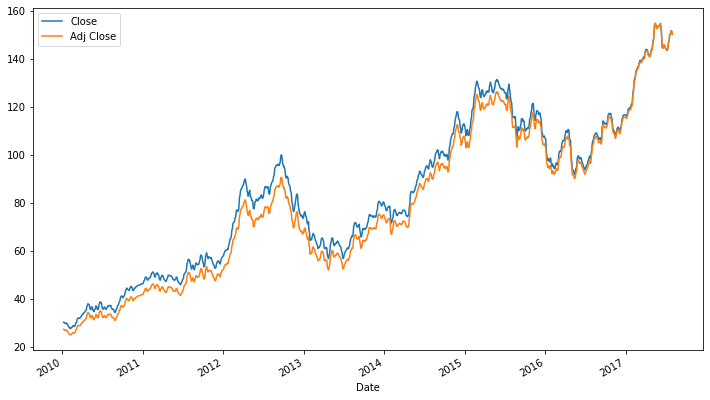

In [383]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

Example

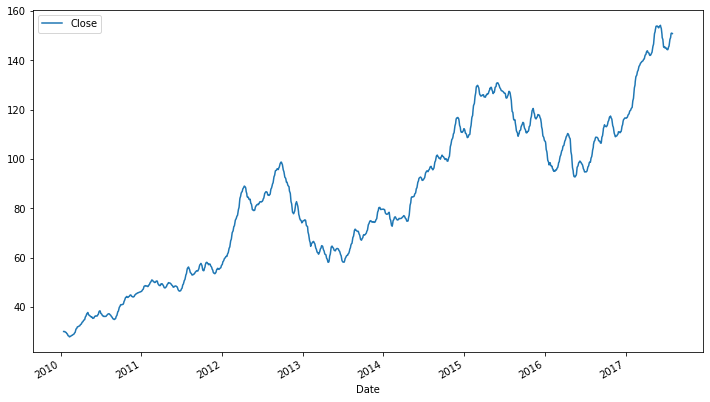

In [384]:
aapl.rolling(10)[['Close']].mean().plot();

--------------------------------------------------------------------------------------------------------

## Drop `Volume`, since it's way bigger than everything else.

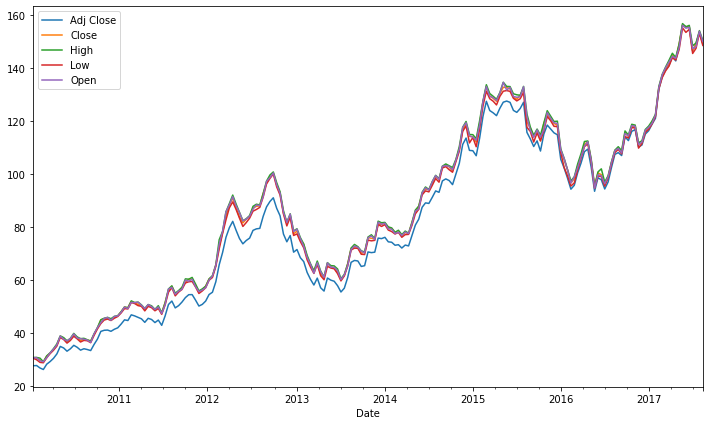

In [385]:
aapl.drop('Volume', axis=1).resample('2W').max().plot();

Example

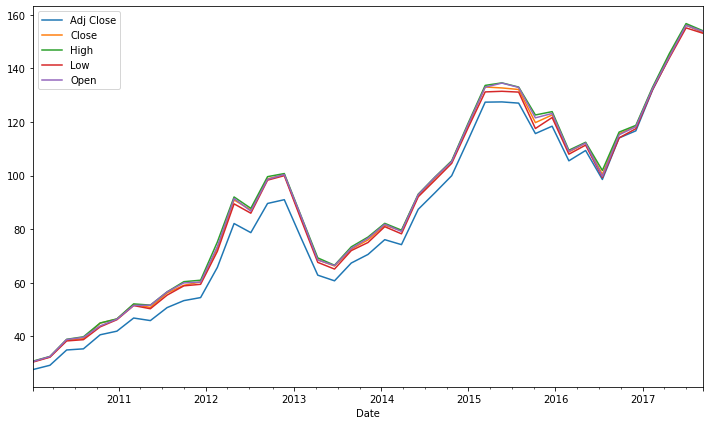

In [386]:
aapl.drop('Volume', axis=1).resample('10W').max().plot();

--------------------------------------------------------------------------------------------------------

## 30-day rolling exponentially-weighted stddev of returns.

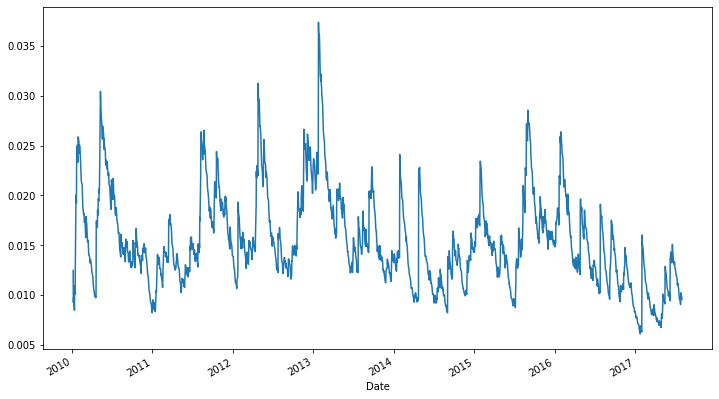

In [387]:
aapl['Close'].pct_change().ewm(span=30).std().plot();

Example

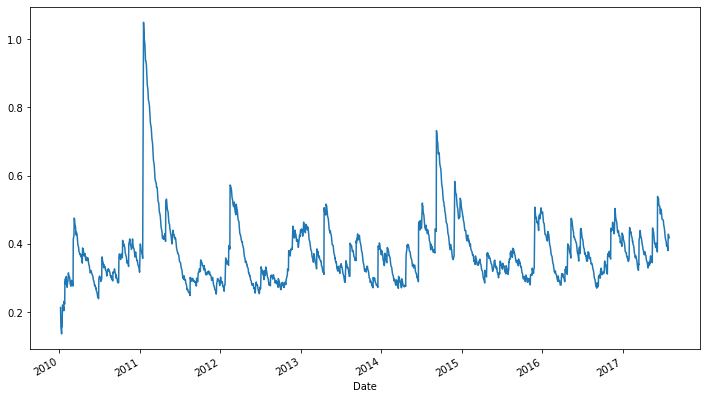

In [388]:
aapl['Volume'].pct_change().ewm(span=50).std().plot();

--------------------------------------------------------------------------------------------------------

# "Real World" Data

In [389]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [390]:
#from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


Example

In [391]:
#from demos.avocados import read_avocadata

newAvocados = read_avocadata('2014', '2018')
newAvocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


--------------------------------------------------------------------------------------------------------

## Unlike numpy arrays, pandas DataFrames can have a different dtype for each column. 

In [392]:
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

Example

In [393]:
newAvocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

--------------------------------------------------------------------------------------------------------

## What's the regional average price of a HASS avocado every day?

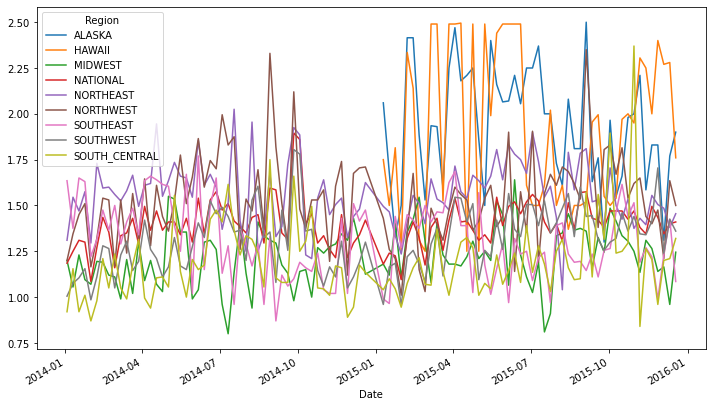

In [394]:
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

Example

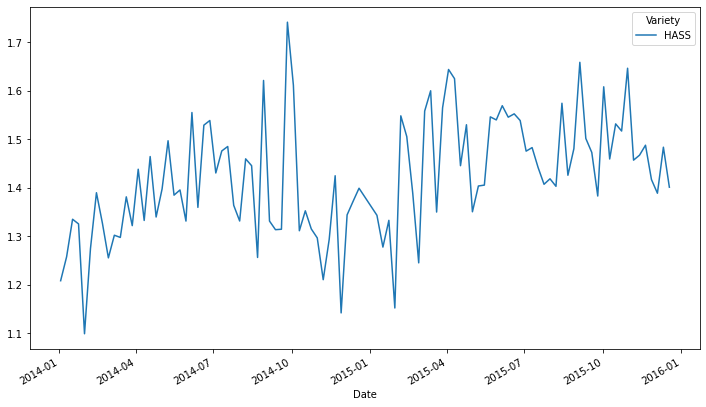

In [395]:
newHass = newAvocados[newAvocados.Variety == 'HASS']
newHass.groupby(['Date', 'Variety'])['Weighted Avg Price'].mean().unstack().ffill().plot();

--------------------------------------------------------------------------------------------------------

In [396]:
def _organic_spread(group):

    if len(group.columns) != 2:
            return pd.Series( index = group.index, data=0.0 )
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

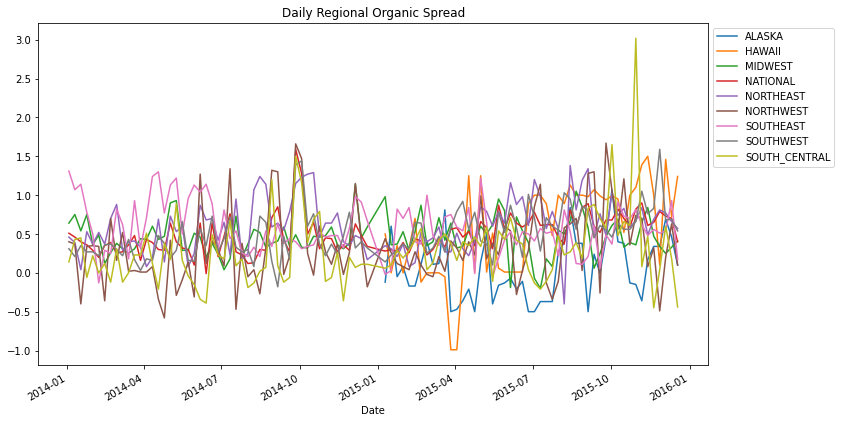

In [397]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

Example

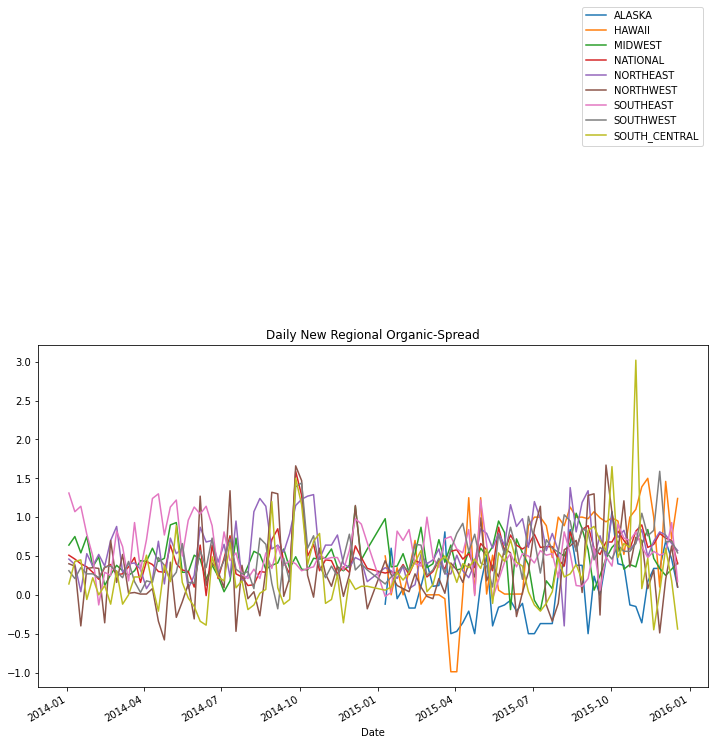

In [398]:
organic_spread_by_region(newHass).plot();
plt.gca().set_title("Daily New Regional Organic-Spread");
plt.legend(bbox_to_anchor=(1, 2));

--------------------------------------------------------------------------------------------------------

In [399]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


Example

In [400]:
other_spread_correlation = organic_spread_by_region(newHass).corr()
other_spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


--------------------------------------------------------------------------------------------------------

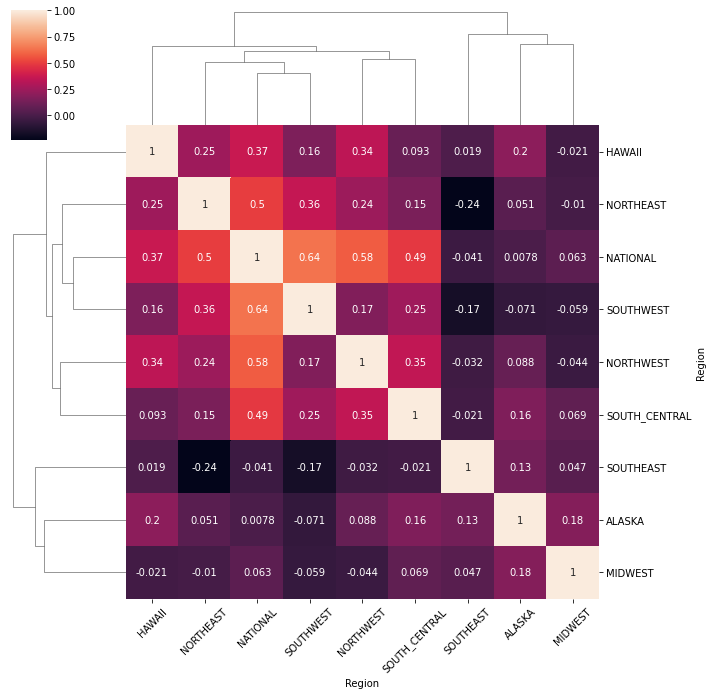

In [401]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Example

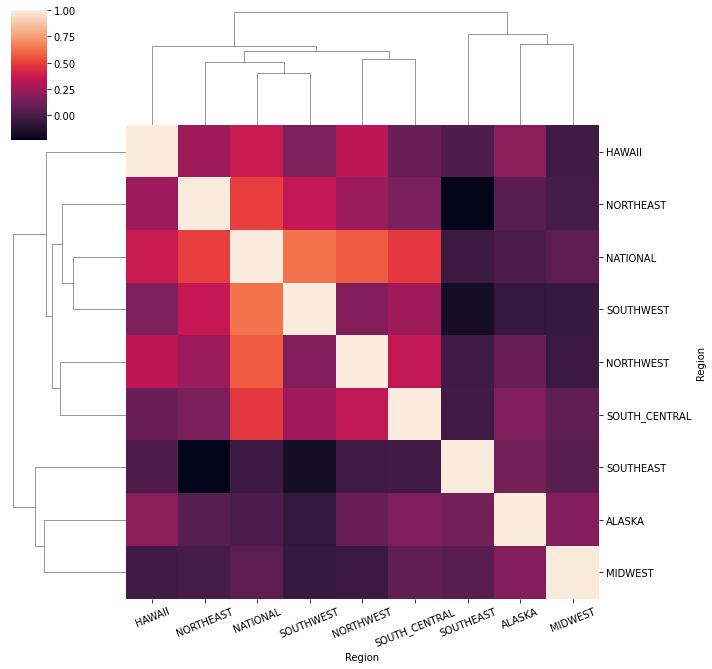

In [402]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=False)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=22);

--------------------------------------------------------------------------------------------------------

# Analysis with the avocados data

In [403]:
myExample = pd.read_csv('https://raw.githubusercontent.com/jotorress/AlgorithmsUN2021II/master/LAB2/Cat_logo_Nacional_de_Estaciones_del_IDEAM.csv')
myExample.head()

,Codigo,Nombre,Categoria,Tecnologia,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Area Operativa,Corriente,Area Hidrografica,Zona Hidrografica,Subzona hidrografica,Entidad
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)","2,582",2016-11-15,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)","2,450",2005-12-10,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)","3,120",2004-03-01,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,NaN,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [415]:
myExample.dtypes

Codigo                   int64
Nombre                  object
Categoria               object
Tecnologia              object
Estado                  object
Departamento            object
Municipio               object
Ubicación               object
Altitud                 object
Fecha_instalacion       object
Fecha_suspension        object
Area Operativa          object
Corriente               object
Area Hidrografica       object
Zona Hidrografica       object
Subzona hidrografica    object
Entidad                 object
dtype: object

## Slicing generalizes to two dimensions as you'd expect:

In [404]:
myExample.iloc[:2, :2]

,Codigo,Nombre
0,52057100,RUMICHACA - AUT [52057100]
1,52055170,LA JOSEFINA - AUT [52055170]


--------------------------------------------------------------------------------------------------------

In [406]:
myExample.loc[:]

,Codigo,Nombre,Categoria,Tecnologia,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Area Operativa,Corriente,Area Hidrografica,Zona Hidrografica,Subzona hidrografica,Entidad
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)","2,582",2016-11-15,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)","2,450",2005-12-10,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)","3,120",2004-03-01,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Pacifico,Patía,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,NaN,Area Operativa 07 - Nariño-Putumayo,Guaitara,Amazonas,Caquetá,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,NaN,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas,Amazonas - Directos,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,4401700167,NIVEL SANGOYACO GARGANTA,Limnimétrica,Automática con Telemetría,Activa,Putumayo,Mocoa,"(1.15872222, -76.67080556)",761,2020-02-25,NaN,Area Operativa 07 - Nariño-Putumayo,Mocoa,Amazonas,Caquetá,Alto Caqueta,UNIDAD NACIONAL DE GESTION DEL RIESGO
8969,4401700168,NIVEL MULATO PALMERAS,Limnimétrica,Automática con Telemetría,Activa,Putumayo,Mocoa,"(1.15638889, -76.69027778)",966,2020-02-25,NaN,Area Operativa 07 - Nariño-Putumayo,Mocoa,Amazonas,Caquetá,Alto Caqueta,UNIDAD NACIONAL DE GESTION DEL RIESGO
8970,4401700172,NIVEL MOCOA PISCIKART,Limnimétrica,Automática con Telemetría,Activa,Putumayo,Villagarzón,"(1.03964167, -76.61091944)",408,2020-02-25,NaN,Area Operativa 07 - Nariño-Putumayo,Mocoa,Amazonas,Caquetá,Alto Caqueta,UNIDAD NACIONAL DE GESTION DEL RIESGO
8971,4401700173,NIVEL RUMIYACO LAGARTO,Limnimétrica,Automática con Telemetría,Activa,Putumayo,Mocoa,"(1.119225, -76.67045)",647,2020-02-25,NaN,Area Operativa 07 - Nariño-Putumayo,Mocoa,Amazonas,Caquetá,Alto Caqueta,UNIDAD NACIONAL DE GESTION DEL RIESGO


## Rolling Operations

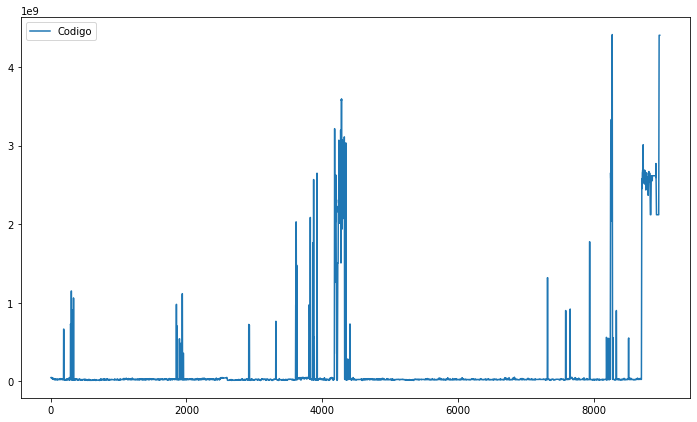

In [407]:
myExample.rolling(5)[['Codigo','Altitud',]].mean().plot();

--------------------------------------------------------------------------------------------------------

## 30-day rolling exponentially-weighted stddev of returns.

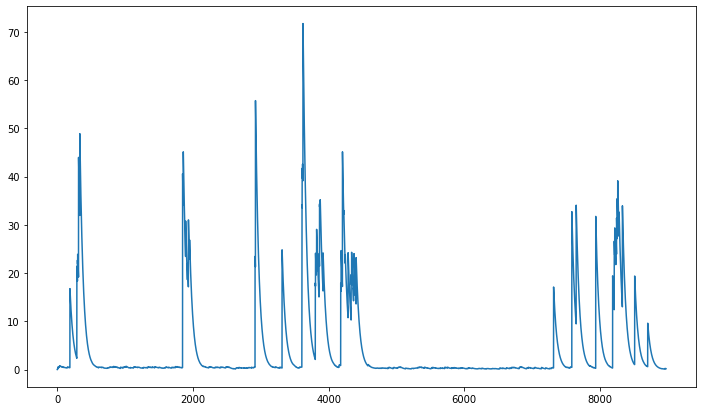

In [413]:
myExample['Codigo'].pct_change().ewm(span=50).std().plot();

--------------------------------------------------------------------------------------------------------

In [425]:
myExample.groupby('Tecnologia').size().reset_index(name = 'Altitud')

,Tecnologia,Altitud
0,Automática con Telemetría,1423
1,Automática sin Telemetría,74
2,Convencional,7476


--------------------------------------------------------------------------------------------------------

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!